In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Intensity Histogram Descriptor

In [2]:
# Compute the histogram
def intensity_histogram(input_image):
    num_bins = 256  # Number of intensity levels (0-255 for grayscale)
    hist = cv2.calcHist([input_image], [0], None, [num_bins], [0, 256])

    # Normalize the histogram
    hist = hist / hist.sum()

    return hist

### Color Histogram

In [3]:
def color_histogram(image):
    color = ('b', 'g', 'r')
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])

    plt.title("Color Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

### RmBG

In [7]:
import rembg

In [8]:
def removeBG(image):
    removed_bg_image = rembg.remove(image)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

    ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap=plt.cm.gray)
    ax1.set_title('Original Image')
    ax1.axis('off')

    ax2.imshow(removed_bg_image)
    ax2.set_title('removed bg image')
    ax2.axis('off')

    plt.show()

### SHOW FUNCTION

In [10]:
def show(first, second, title):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(first, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.plot(second, color='black')
    plt.title("Intensity Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

# MAIN

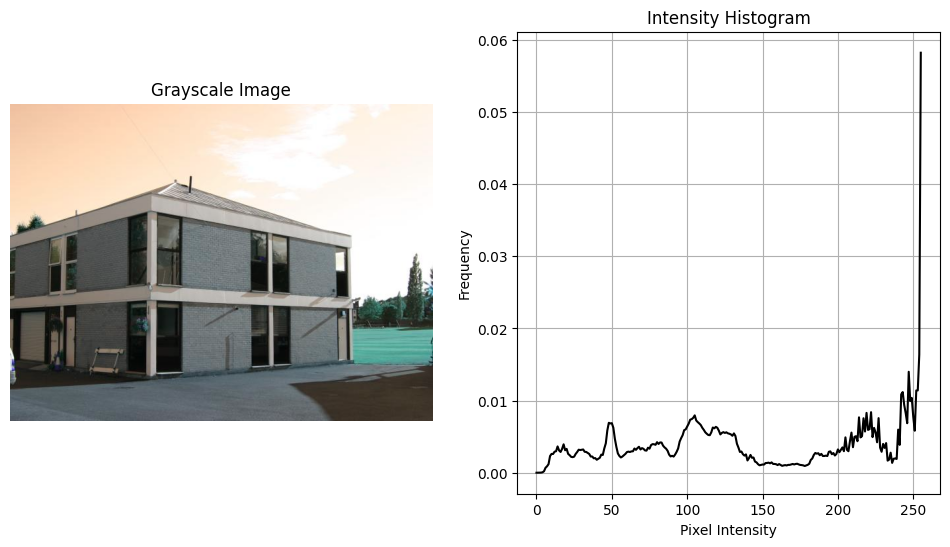

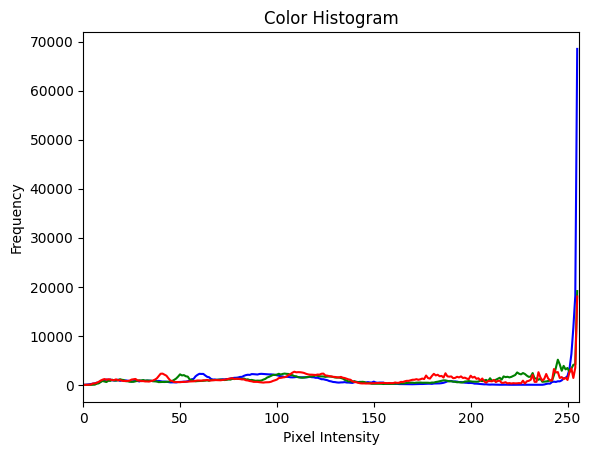

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 347GB/s]


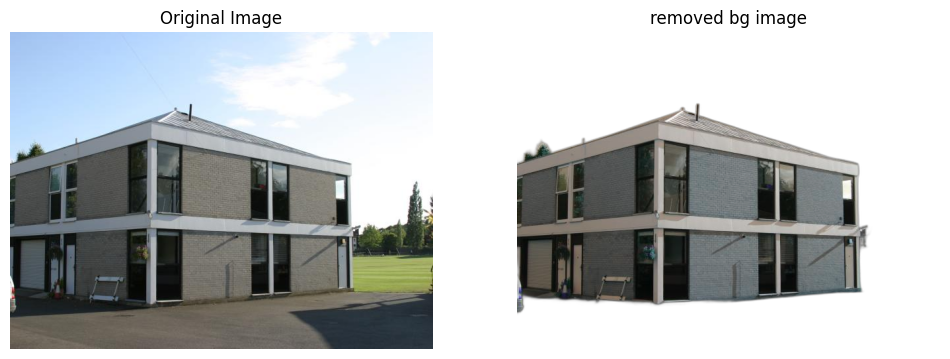

In [11]:
# Load the image in grayscale
image_path = 'msrcorid/buildings/183_8326.JPG'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

if image is None:
    raise ValueError("Image not found. Please provide a valid image path.")

# intensity histogram
hist = intensity_histogram(gray_image)
show(image, hist, 'Intensity Histogram')

# color histogram
color_histogram(image)

# rembg
removeBG(image)